Submitted by Tarang Ranpara - 202011057

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading data
data_dir = './drive/MyDrive/IRLAB/A4/stemming-assignment.txt'
with open(data_dir, 'r') as file:
    data = file.readlines()

# removing '\n'
data = [s.split('\n')[0] for s in data]
data[:10]

['a',
 'aaron',
 'abaissiez',
 'abandon',
 'abandoned',
 'abase',
 'abash',
 'abate',
 'abated',
 'abatement']

# Distance Measures

In [ ]:
class DistanceMeasures:
    def __init__(self):
        self.inf = 9999

    def pi(self, s1, s2):
        l1 = len(s1)
        l2 = len(s2)

        min_ind = min(l1, l2)

        answer = []
        index = None
        for i in range(max(l1, l2)):
            if i < min_ind and s1[i] == s2[i]:
                answer.append(0)
            else:
                if index == None:
                    index = i
                answer.append(1)
        if sum(answer) == 0:
            index = 0

        return answer, l1, l2, index, len(answer)
    
    def d1(self, s1, s2):
        answer, l1, l2, m, n = self.pi(s1, s2)
        if m == None:
            return self.inf
        else:
            distance = 0
            for i in range(m, n):
                distance += (1/2**i) * answer[i]

            return distance

    def d2(self, s1, s2):
        answer, l1, l2, m, n = self.pi(s1, s2)
        if m == None or m==0 or sum(answer) == 0:
            return self.inf
        else:
            return (1/m) * (1 - (0.5)**(n-m))/(0.5)

    def d3(self, s1, s2):
        answer, l1, l2, m, n = self.pi(s1, s2)
        if m == None or m==0 or sum(answer) == 0:
            return self.inf
        else:
            return (n-m)/(m) * (1 - (0.5)**(n-m))/(0.5)

    def d4(self, s1, s2):
        answer, l1, l2, m, n = self.pi(s1, s2)
        if m == None:
            return self.inf
        else:
            if sum(answer) == 0:
                return 0
            return (n-m)/(n) * (1 - (0.5)**(n-m))/(0.5)

    def memoize(func):
        mem = {}
        def memoizer(*args, **kwargs):
            key = str(args) + str(kwargs)
            if key not in mem:
                mem[key] = func(*args, **kwargs)
            return mem[key]
        return memoizer


    @memoize    
    def levenshtein(self, s, t):
        if s == "":
            return len(t)
        if t == "":
            return len(s)
        if s[-1] == t[-1]:
            cost = 0
        else:
            cost = 1

        res = min([self.levenshtein(s[:-1], t)+1,
                  self.levenshtein(s, t[:-1])+1, 
                  self.levenshtein(s[:-1], t[:-1]) + cost])

        return res

In [ ]:
dm = DistanceMeasures()

Testing distance measure values as per paper

In [ ]:
# cross verification of values from paper
print(f"D1: {dm.d1('astronomer', 'astronomically')}")
print(f"D2: {dm.d2('astronomer', 'astronomically')}")
print(f"D3: {dm.d3('astronomer', 'astronomically')}")
print(f"D4: {dm.d4('astronomer', 'astronomically')}")
print(f"levenshtein: {dm.levenshtein('astronomer', 'astronomically')}")

D1: 0.0076904296875
D2: 0.24609375
D3: 1.4765625
D4: 0.84375
levenshtein: 6


In [ ]:
# cross verification of values from paper
print(f"D1: {dm.d1('astronomer', 'astonish')}")
print(f"D2: {dm.d2('astronomer', 'astonish')}")
print(f"D3: {dm.d3('astronomer', 'astonish')}")
print(f"D4: {dm.d4('astronomer', 'astonish')}")
print(f"levenshtein: {dm.levenshtein('astronomer', 'astonish')}")

D1: 0.248046875
D2: 0.6614583333333333
D3: 4.630208333333334
D4: 1.3890624999999999
levenshtein: 5


In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import pickle

D1 Matrix

In [ ]:
# calculate distance matrix d1
d1_p = np.zeros((len(data), len(data)))
 
for i in range(len(data)):
    for j in range(i+1, len(data)):
        temp = dm.d1(data[i], data[j])
        d1_p[i,j], d1_p[j, i] = temp, temp

In [ ]:
# save matrix in a file
with open('./drive/MyDrive/IRLAB/A4/d1.npy', 'wb') as f:
    np.save(f, d1_p)

D2 Matrix

In [ ]:
# calculate distance matrix d2
d2_p = np.zeros((len(data), len(data)))
 
for i in range(len(data)):
    for j in range(i+1, len(data)):
        temp = dm.d2(data[i], data[j])
        d2_p[i,j], d2_p[j, i] = temp, temp

In [ ]:
# save matrix in a file
with open('./drive/MyDrive/IRLAB/A4/d2.npy', 'wb') as f:
    np.save(f, d2_p)

D3 Matrix 

In [ ]:
# calculate distance matrix d3
d3_p = np.zeros((len(data), len(data)))
 
for i in range(len(data)):
    for j in range(i+1, len(data)):
        temp = dm.d3(data[i], data[j])
        d3_p[i,j], d3_p[j, i] = temp, temp

In [ ]:
# save matrix in a file
with open('./drive/MyDrive/IRLAB/A4/d3.npy', 'wb') as f:
    np.save(f, d3_p)

D4 Matrix 

In [ ]:
# calculate distance matrix d4
d4_p = np.zeros((len(data), len(data)))
 
for i in range(len(data)):
    for j in range(i+1, len(data)):
        temp = dm.d4(data[i], data[j])
        d4_p[i,j], d4_p[j, i] = temp, temp

In [ ]:
# save matrix in a file
with open('./drive/MyDrive/IRLAB/A4/d4.npy', 'wb') as f:
    np.save(f, d4_p)

calculating clusters by D1 by agglomerative clustering

In [ ]:
d1_p = np.load('./drive/MyDrive/IRLAB/A4/d1.npy', mmap_mode = 'r')

In [ ]:
t1 = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
for th in t1:
    clustering = AgglomerativeClustering(affinity = 'precomputed', linkage='single', distance_threshold = th, compute_full_tree = True, n_clusters = None)
    cl_obj = clustering.fit(d1_p)
    with open(f'./drive/MyDrive/IRLAB/A4/clusters/d1/{int(th*100)}', 'wb') as file:
        pickle.dump(cl_obj, file)

calculating clusters by D2 by agglomerative clustering

In [ ]:
d2_p = np.load('./drive/MyDrive/IRLAB/A4/d2.npy', mmap_mode = 'r')

In [ ]:
t2 = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
for th in t2:
    print(th, end=' ')
    clustering = AgglomerativeClustering(affinity = 'precomputed', linkage='single', distance_threshold = th, compute_full_tree = True, n_clusters = None)
    cl_obj = clustering.fit(d2_p)
    with open(f'./drive/MyDrive/IRLAB/A4/clusters/d2/{int(th*100)}', 'wb') as file:
        pickle.dump(cl_obj, file)

0.05 0.1 0.15 0.2 0.25 0.3 0.35 0.4 0.45 0.5 0.55 0.6 0.65 0.7 0.75 0.8 0.85 0.9 0.95 1.0 

calculating clusters by D3 by agglomerative clustering

In [ ]:
d3_p = np.load('./drive/MyDrive/IRLAB/A4/d3.npy', mmap_mode = 'r')

In [ ]:
t3 = [0.25, 0.50, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
for th in t3:
    print(th, end=' ')
    clustering = AgglomerativeClustering(affinity = 'precomputed', linkage='single', distance_threshold = th, compute_full_tree = True, n_clusters = None)
    cl_obj = clustering.fit(d3_p)
    with open(f'./drive/MyDrive/IRLAB/A4/clusters/d3/{int(th*100)}', 'wb') as file:
        pickle.dump(cl_obj, file)

0.25 0.5 0.75 1 1.25 1.5 1.75 2 2.25 2.5 2.75 3 

calculating clusters by D4 by agglomerative clustering

In [ ]:
d4_p = np.load('./drive/MyDrive/IRLAB/A4/d4.npy', mmap_mode = 'r')

In [ ]:
t4 = [0.15, 0.2, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
for th in t4:
    clustering = AgglomerativeClustering(affinity = 'precomputed', linkage='single', distance_threshold = th, compute_full_tree = True, n_clusters = None)
    cl_obj = clustering.fit(d4_p)
    with open(f'./drive/MyDrive/IRLAB/A4/clusters/d4/{int(th*100)}', 'wb') as file:
        pickle.dump(cl_obj, file)

# Plotting number of clusters vs threshold

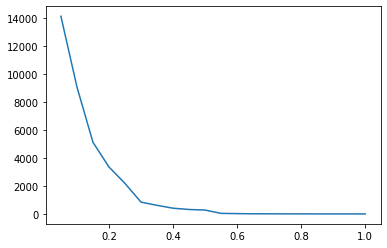

In [ ]:
# plotting for D1
import os
import matplotlib.pyplot as plt
 
dir_path = './drive/MyDrive/IRLAB/A4/clusters/d1'
d1_files = os.listdir(dir_path)

labels = []
th = []
for fil in d1_files:
    th.append(int(fil) / 100)
    obj = pickle.load(open(os.path.join(dir_path, fil), 'rb'))
    labels.append(np.max(obj.labels_)+1)

plt.plot(th, labels)
plt.show()

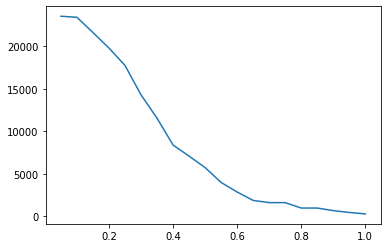

In [ ]:
# plotting for D2
dir_path = './drive/MyDrive/IRLAB/A4/clusters/d2'
d1_files = os.listdir(dir_path)

labels = []
th = []
for fil in d2_files:
    th.append(int(fil) / 100)
    obj = pickle.load(open(os.path.join(dir_path, fil), 'rb'))
    labels.append(np.max(obj.labels_)+1)

plt.plot(th, labels)
plt.show()

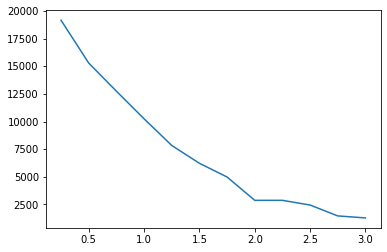

In [ ]:
# plotting for D3
dir_path = './drive/MyDrive/IRLAB/A4/clusters/d3'
d3_files = os.listdir(dir_path)

labels = []
th = []
for fil in d3_files:
    th.append(int(fil) / 100)
    obj = pickle.load(open(os.path.join(dir_path, fil), 'rb'))
    labels.append(np.max(obj.labels_)+1)

plt.plot(th, labels)
plt.show()

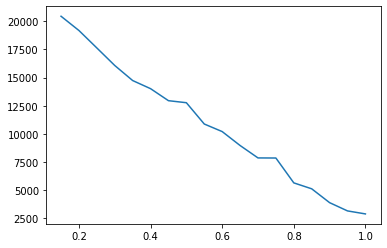

In [ ]:
# plotting for D4
dir_path = './drive/MyDrive/IRLAB/A4/clusters/d4'
d4_files = os.listdir(dir_path)

labels = []
th = []
for fil in d4_files:
    th.append(int(fil) / 100)
    obj = pickle.load(open(os.path.join(dir_path, fil), 'rb'))
    labels.append(np.max(obj.labels_)+1)

plt.plot(th, labels)
plt.show()

# YASS Stemmer

In [ ]:
class YASS_Stemmer:
    def __init__(self, data):
        # YASS stemmer by d4 and threshold = 0.1
        self.d4_obj = pickle.load(open(os.path.join('./drive/MyDrive/IRLAB/A4/clusters/d4', '100'),'rb'))

        self.clusters = self.d4_obj.labels_
        self.cluster_word_dict = dict()
        for i in range(len(self.clusters)):
            cluster_no = self.clusters[i]

            if cluster_no in self.cluster_word_dict:
                self.cluster_word_dict[cluster_no].append(data[i])
            else:
                self.cluster_word_dict[cluster_no] = [data[i]]

        self.cluster_root_dict = dict()
        for key, val in self.cluster_word_dict.items():
            self.cluster_root_dict[key] = min(val, key = len)

    def stem(self, word):
        for key, value in self.cluster_word_dict.items():
            if word in value:
                return True, self.cluster_root_dict[key]

        return False, word

In [ ]:
yass = YASS_Stemmer(data)

Loading Fire Dataset

In [ ]:
# unzip the data
! mkdir data
! cp 'drive/MyDrive/IRLAB/A3/FIRE_Dataset_EN_2010.rar' './data/FIRE_Dataset_EN_2010.rar'
! unrar x data/FIRE_Dataset_EN_2010.rar data
! tar -xvf  './data/FIRE_Dataset_EN_2010/English-Data.tgz' -C './data/FIRE_Dataset_EN_2010/'

Streaming output truncated to the last 5000 lines.
TELEGRAPH_UTF8/2007_utf8/sports/1070225_sports_story_7438352.utf8
TELEGRAPH_UTF8/2007_utf8/sports/1070621_sports_story_7952331.utf8
TELEGRAPH_UTF8/2007_utf8/sports/1070207_sports_story_7360730.utf8
TELEGRAPH_UTF8/2007_utf8/sports/1070919_sports_story_8334184.utf8
TELEGRAPH_UTF8/2007_utf8/sports/1070218_sports_story_7407969.utf8
TELEGRAPH_UTF8/2007_utf8/sports/1070317_sports_story_7529504.utf8
TELEGRAPH_UTF8/2007_utf8/sports/1070411_sports_story_7632626.utf8
TELEGRAPH_UTF8/2007_utf8/sports/1070507_sports_story_7743729.utf8
TELEGRAPH_UTF8/2007_utf8/sports/1070318_sports_story_7533511.utf8
TELEGRAPH_UTF8/2007_utf8/sports/1070625_sports_story_7969700.utf8
TELEGRAPH_UTF8/2007_utf8/sports/1070521_sports_story_7807303.utf8
TELEGRAPH_UTF8/2007_utf8/sports/1070517_sports_story_7787900.utf8
TELEGRAPH_UTF8/2007_utf8/sports/1070814_sports_story_8191386.utf8
TELEGRAPH_UTF8/2007_utf8/sports/1070908_sports_story_8291527.utf8
TELEGRAPH_UTF8/2007_utf8/

In [ ]:
import re
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup as bs
from sklearn.feature_extraction.text import TfidfVectorizer

# downloading essentials
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
class DataReader:
    def read_and_process(self, data_dir):

        # stopwords
        stopwords = set(nltk.corpus.stopwords.words('english'))

        # wordnet lemmatizer
        yass = YASS_Stemmer(data)

        file_names = []
        text_tokens = []

        i = 0
        # iterating over 2004, 2005, 2006, 2007 etc dirs
        for dir in os.listdir(data_dir):
            dir_name = os.path.join(data_dir,dir)

            # iterating over bengal, business, foreign etc dirs
            for sub_dir in os.listdir(dir_name):
                sub_dir_name = os.path.join(dir_name,sub_dir)
                data_files = os.listdir(sub_dir_name)

                for f in data_files:
                    f_name = os.path.join(sub_dir_name,f)

                    with open(f_name,'r') as fobj:
                        content = fobj.read()

                    soup = bs(content, "lxml")

                    # find text tag
                    temp_text_data = soup.find('text').text

                    # converting text to lower case
                    temp_text_data = temp_text_data.lower()

                    # removing numbers and special chars
                    temp_text_data = re.sub(r'[^\w\s]', '', temp_text_data)
                    temp_text_data = re.sub(r'\d+', '', temp_text_data)

                    # tokens
                    tokens = nltk.word_tokenize(temp_text_data)

                    # removing stopwords
                    tokens = [token for token in tokens if token not in stopwords]

                    # lemmatizing
                    tokens = list(map(yass.stem, tokens))

                    # removing empty files
                    if len(tokens) > 0:
                        text_tokens.append(tokens)
                        file_names.append(f)

                        print(i, ' - ', f)
                        i += 1

                    # list of tokens, list of file names
        return text_tokens, file_names

In [ ]:
# reading and preprocessing the docs 
data_dir = "./data/FIRE_Dataset_EN_2010/TELEGRAPH_UTF8/"

dr = DataReader()
text_tokens, file_names = dr.read_and_process(data_dir)

Streaming output truncated to the last 5000 lines.
120516  -  1061101_business_story_6943865.utf8
120517  -  1060717_business_story_6487729.utf8
120518  -  1060418_business_story_6112538.utf8
120519  -  1060727_business_story_6531106.utf8
120520  -  1060609_business_story_6330102.utf8
120521  -  1060506_business_index.utf8
120522  -  1061211_business_story_7124199.utf8
120523  -  1060125_business_index.utf8
120524  -  1061114_business_story_6998909.utf8
120525  -  1061221_business_story_7166050.utf8
120526  -  1060616_business_story_6359618.utf8
120527  -  1061010_business_story_6850836.utf8
120528  -  1061224_business_story_7179129.utf8
120529  -  1060412_business_story_6088085.utf8
120530  -  1060121_business_story_5748498.utf8
120531  -  1060525_business_story_6267388.utf8
120532  -  1060215_business_story_5848782.utf8
120533  -  1060809_business_story_6587718.utf8
120534  -  1060110_business_story_5701817.utf8
120535  -  1060407_business_story_6068402.utf8
120536  -  1060125_busine

In [ ]:
# pickling the objects for future use - i.e to avoid recalculation
with open('./drive/MyDrive/IRLAB/A4/text_tokens', 'wb') as fileobj:
  pickle.dump(text_tokens, fileobj)

with open('./drive/MyDrive/IRLAB/A4/file_names', 'wb') as fileobj:
  pickle.dump(file_names, fileobj)

In [ ]:
with open('./drive/MyDrive/IRLAB/A4/text_tokens', 'rb') as fileobj:
  text_tokens = pickle.load(fileobj)

with open('./drive/MyDrive/IRLAB/A4/file_names', 'rb') as fileobj:
  file_names = pickle.load(fileobj)

In [ ]:
for i in range(len(text_tokens)):
    text_tokens[i] = list(map(lambda x: x[1], text_tokens[i]))

In [ ]:
token_freq = []

# unique words in corpora
unique_words = set()

for doc in text_tokens:
    words, counts = np.unique(doc, return_counts=True)
    token_freq.append(dict(zip(words,[count/len(doc) for count in counts])))
  
    for token in words:
        if token not in unique_words:
            unique_words.add(token)

print('word - freq boW Total: ', len(token_freq))
print('word - freq boW:', token_freq[0])
print('unique words:', len(unique_words))

word - freq boW Total:  125516
word - freq boW: {'a': 0.032663316582914576, 'abr': 0.002512562814070352, 'accus': 0.002512562814070352, 'activists': 0.002512562814070352, 'administrative': 0.002512562814070352, 'agitation': 0.005025125628140704, 'agitators': 0.002512562814070352, 'ahead': 0.002512562814070352, 'announced': 0.002512562814070352, 'arc': 0.002512562814070352, 'area': 0.002512562814070352, 'ashis': 0.002512562814070352, 'b': 0.005025125628140704, 'banerjee': 0.002512562814070352, 'bengal': 0.007537688442211055, 'bhattacharjee': 0.005025125628140704, 'bhattacharjees': 0.005025125628140704, 'bid': 0.002512562814070352, 'biggest': 0.005025125628140704, 'blab': 0.002512562814070352, 'bloodbath': 0.002512562814070352, 'blunder': 0.002512562814070352, 'brac': 0.002512562814070352, 'bud': 0.005025125628140704, 'buddha': 0.002512562814070352, 'buddhadeb': 0.002512562814070352, 'build': 0.002512562814070352, 'c': 0.022613065326633167, 'calcutta': 0.002512562814070352, 'calcuttas': 

In [ ]:
# calculating IDF
idf = dict(zip(unique_words,[0] * len(unique_words)))

for doc in token_freq:
    for token in doc:
        idf[token] += 1
for token in idf:
  idf[token] = np.log10(len(token_freq)/idf[token])

In [ ]:
# Calculating TF-IDF 
tf_idf = []
for doc in token_freq:
    temp_tf_idf = {}
  
    for token in doc:
        temp_tf_idf[token] = doc[token]*idf[token]
  
    tf_idf.append(temp_tf_idf)

# len of tfidf
print(len(tf_idf))

# tfidf of 0th doc
print(len(tf_idf[0]))

125516
173


In [ ]:
class QueryReader:

    def process(self,data_dir):
        stopwords = set(nltk.corpus.stopwords.words('english'))
        lemmatizer = nltk.stem.WordNetLemmatizer()

        with open(data_dir,'r') as f:
            content = f.read()

        soup = bs(content, "lxml")

        # extracting query num
        qNum = [int(num.text) for num in soup.find_all('num')]

        # using desc field of query, removing everything except alphanumeric chars and spaces
        queries = [re.sub(r'[^a-zA-Z\s]', '', desc.text.strip().lower()) for desc in soup.find_all('desc')]

        # tokenization 
        q_tokens = [nltk.word_tokenize(query) for query in queries]

        # removing stopwords 
        q_tokens = [[token for token in tokens if token not in stopwords] for tokens in q_tokens]

        # lemmatizing
        q_tokens = [list(map(lemmatizer.lemmatize,tokens)) for tokens in q_tokens]

        # list of query nums, list of tokens
        return qNum, q_tokens

In [ ]:
qr = QueryReader()
qNum,queries_tokens = qr.process('./data/FIRE_Dataset_EN_2010/en.topics.76-125.2010.txt')

queries_tokens = [[token for token in tokens if token in unique_words] for tokens in queries_tokens]

print(qNum)
for q in queries_tokens:
    print(q)

[76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125]
['meena', 'inclusion', 'gurjars', 'scheduled']
['attack', 'hezbollah', 'guerrilla', 'israeli']
['ashok', 'singhal', 'president', 'vishwa', 'hindu', 'parishad', 'lk', 'advani', 'bjp', 'mandir']
['plan', 'build', 'everest']
['initiation', 'legal', 'advani', 'involvement', 'demolition', 'babri', 'masjid']
['ministry', 'plan', 'protect', 'japanese', 'encephalitis', 'problem', 'arisen', 'implementing', 'plan']
['bus', 'srinagar', 'muzaffarabad', 'role', 'solving', 'indopak']
['laloo', 'prasad', 'yadav', 'vila', 'paswan', 'vote', 'muslim', 'voter']
['brinda', 'karat', 'swami', 'ramdev', 'animal']
['remand', 'abu', 'salem', 'mumbai', 'bomb']
['privatize', 'mumbai', 'delhi', 'airport', 'bid']
['discussion', 'manmohan', 'singh', 'pervez', 'musharraf', 'president', 'pakist

In [ ]:
query_token_freq = []
for query in queries_tokens:
    words, counts = np.unique(query, return_counts=True)
    query_token_freq.append(dict(zip(words,[count/len(query) for count in counts])))
  
print(len(query_token_freq))

50


In [ ]:
query_tf_idf = []
for query in query_token_freq:
    temp = {}
    for token in query:
        temp[token] = query[token]*idf[token]
    query_tf_idf.append(temp)

In [ ]:
# for each query it'll contain top 10 pair(cosine similarity, doc_idx)
top_doc_list = []

for query in query_tf_idf:
    temp_query_cosine = []
    i = 0
    for doc in tf_idf:
        query_dot_doc = 0
        for token in query:
            if token in doc:
                query_dot_doc += query[token]*doc[token]

        norm_doc = np.linalg.norm(list(doc.values()))
        norm_query = np.linalg.norm(list(query.values()))

        if norm_doc == 0 or norm_query == 0:
            cosine = 0
        else:
            cosine = query_dot_doc/(norm_doc*norm_query)

        temp_query_cosine.append((cosine,i))
        i += 1

    # reverse sorting
    temp_query_cosine.sort(reverse=True)

    # appending qeury results
    top_doc_list.append(temp_query_cosine[:10])

In [ ]:
# tuples of (cosine similarity, doc_idx)
for i in top_doc_list:
    print(i)

[(0.20424244405895242, 86448), (0.19202019914298202, 61124), (0.18892638894399377, 42398), (0.1877827833331471, 21589), (0.18249236181758757, 93059), (0.16883648562359774, 19434), (0.16145060011256007, 9764), (0.1500066697243396, 59997), (0.14816908961271724, 1044), (0.14650991021011278, 105532)]
[(0.26943128180555365, 122541), (0.25890691286138007, 20567), (0.24013715008077757, 68229), (0.2285202768069683, 125142), (0.22044220555540978, 124786), (0.21503692401751562, 115256), (0.21414606778993361, 69853), (0.21253395044890142, 122969), (0.20982726976528873, 122956), (0.20799648291223652, 122960)]
[(0.45537642986461213, 54217), (0.4508558165064366, 79923), (0.3654658234422856, 110140), (0.3423561059642988, 56400), (0.33862309703422766, 79639), (0.3282767947603143, 81047), (0.3275527542315906, 72621), (0.32750320369221575, 33457), (0.32205809057478774, 58198), (0.3150660252789932, 80529)]
[(0.5919151605233303, 84781), (0.5745117104181102, 2905), (0.5721345226735646, 22472), (0.571523378

In [ ]:
class QrelsReader:
    def process(self,file_path):
        qrels = [set() for _ in range(50)]
        with open(file_path) as f:
            lines = f.readlines()
        for line in lines:
            line_split = line.strip().split()
            if line_split[-1]=='1':
                qrels[int(line_split[0])-76].add(line_split[2].strip())
        return qrels

# reading 
qrels_reader = QrelsReader()
relevance = qrels_reader.process("./data/FIRE_Dataset_EN_2010/en.qrels.76-125.2010.txt")

print(relevance[0])

{'1070611_nation_story_7906812.utf8', '1070530_nation_story_7849973.utf8', '1070602_nation_story_7865940.utf8', '1070603_nation_story_7869357.utf8'}


In [ ]:
# 0 if not releavant
query_doc_releavance_mat = np.zeros((50,10))

# iterating over all 50 queries
for i in range(50):

    # iterating over top 10 results
    for j in range(10):
        if file_names[top_doc_list[i][j][1]] in relevance[i]:
            query_doc_releavance_mat[i,j] = 1

In [ ]:
Pr = np.zeros((50,10))
Re = np.zeros((50,10))

AP = np.zeros(50)

for i in range(50):

    n = 0
    for j in range(10):
        if query_doc_releavance_mat[i,j]==1:
            n += 1

        Pr[i,j] = n/(j+1)
        if query_doc_releavance_mat[i,j]==1:
            AP[i] +=  Pr[i,j]

    if n == 0:
        continue;

    AP[i] /= n
    count = 0

    for j in range(10):
        if query_doc_releavance_mat[i,j]==1:
            count += 1
    Re[i,j] = count/n

# mAP Value

In [ ]:
mAP = sum(AP)/len(AP)
print('mAP: ', mAP)

mAP:  0.4034553571428571


comparison: in Assignment 3, mAP value was around 0.43 where we used porter stemmer. you can find that notebook [here](https://drive.google.com/file/d/1GaKuECWrl7ZvSBcYK94Xq-8kFeeMI_R1/view?usp=sharing)